### Importance of Meanders

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [51]:
plt.rcParams['font.size'] = 16

In [2]:
# Start with 2015
year = 2015

In [3]:
def check_nan(ds):
    for j, index in enumerate(ds.index):
        if ds.transport.iloc[j] != ds.transport.iloc[j]:
            print (index)

In [4]:
def read_file(filestub, years):
    output = {}
    for year in years:
        output[year]= pd.read_csv(f'{filestub}_{year}_v3.csv', index_col=0, parse_dates=True).fillna(0)
        print (year, output[year].transport.mean()/1000.); check_nan(output[year])
    return output

### 1. Tidal Period Loops ###

Water Flux = 0.2212820305096734
4451.082495093483
-1.8554313074321638


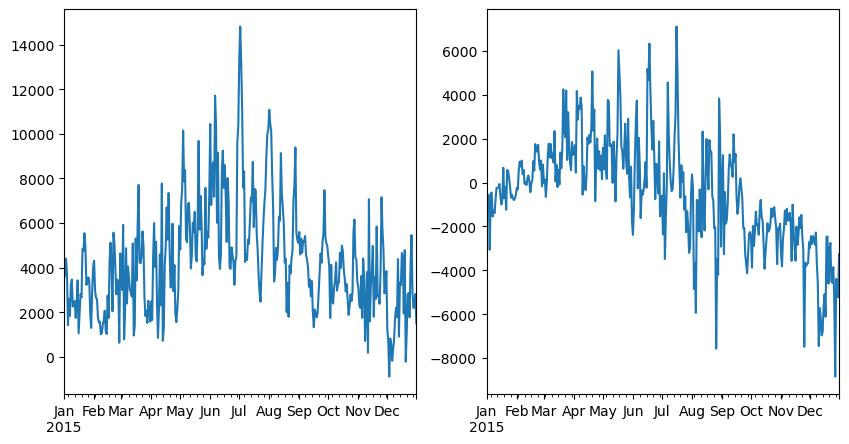

In [5]:
section = 'PR'
TidalPump_PR = pd.read_csv(f'{section}_tidalpump_{year}_v3.csv', index_col=0, parse_dates=True)
section = 'GI'
TidalPump_GI = pd.read_csv(f'{section}_tidalpump_{year}_v3.csv', index_col=0, parse_dates=True)
TidalPump_transport = (TidalPump_PR.transport+ TidalPump_GI.transport).mean()/1e6
TidalPump_salt_transport = (TidalPump_PR.transport * (TidalPump_PR.final_salt - TidalPump_PR.init_salt) +
                           TidalPump_GI.transport * (TidalPump_GI.final_salt - TidalPump_GI.init_salt))
TidalPump_heat_transport = (TidalPump_PR.transport * (TidalPump_PR.final_temp - TidalPump_PR.init_temp) +
                           TidalPump_GI.transport * (TidalPump_GI.final_temp - TidalPump_GI.init_temp))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
TidalPump_salt_transport.plot(ax=axs[0])
TidalPump_heat_transport.plot(ax=axs[1])
print ('Water Flux =', TidalPump_transport) 
print (TidalPump_salt_transport.mean()*1024/1000)
print (TidalPump_heat_transport.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 2. Loops Longer than a Day ###

Water Flux = 0.051068573127834256
39586.093947464535
-63.88183811458998


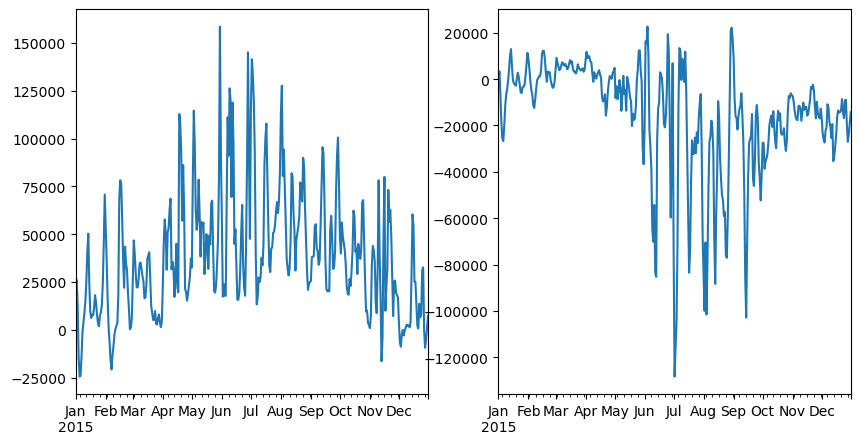

In [6]:
section = 'PR'
LongLoops_PR = pd.read_csv(f'{section}_loops_{year}_v3.csv', index_col=0, parse_dates=True)
section = 'GI'
LongLoops_GI = pd.read_csv(f'{section}_loops_{year}_v3.csv', index_col=0, parse_dates=True)
LongLoops_transport = (LongLoops_PR.transport+ LongLoops_GI.transport).mean()/1e6
LongLoops_salt_transport = (LongLoops_PR.transport * (LongLoops_PR.final_salt - LongLoops_PR.init_salt) +
                           LongLoops_GI.transport * (LongLoops_GI.final_salt - LongLoops_GI.init_salt))
LongLoops_heat_transport = (LongLoops_PR.transport * (LongLoops_PR.final_temp - LongLoops_PR.init_temp) +
                           LongLoops_GI.transport * (LongLoops_GI.final_temp - LongLoops_GI.init_temp))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
LongLoops_salt_transport.plot(ax=axs[0])
LongLoops_heat_transport.plot(ax=axs[1])
print ('Water Flux =', LongLoops_transport) 
print (LongLoops_salt_transport.mean()*1024/1000)
print (LongLoops_heat_transport.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 3. Flux to the South ###

2015 23.923387363466393
2015 24.05030665710093
2015 8.115411705285158
2015 7.975172729078504
2015 3.54130150048883
2015 0.4889677950996
2015 0.22480574956460067
2015 0.026093872810457518
Water Flux = -0.03631330814542898
-1033155.6833172543
-1725.3088625137177


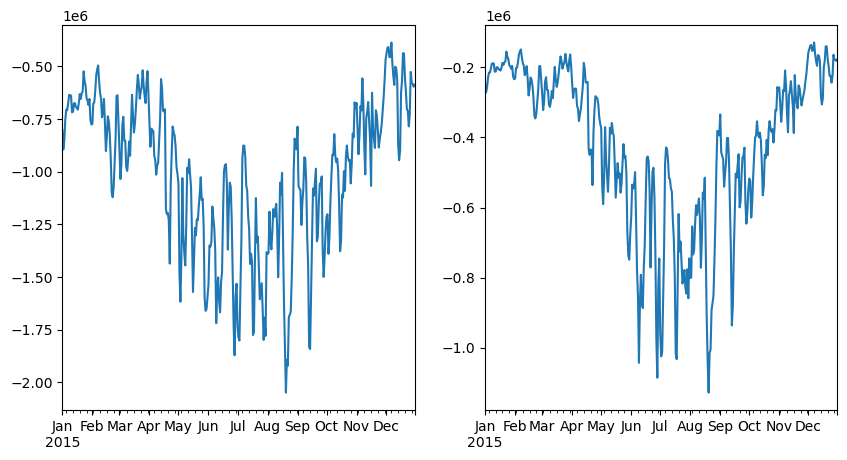

In [7]:
PRtV = read_file('PR_to_Vic', years=[2015])
VfPR = read_file('Vic_from_PR', years=[2015])
GItV = read_file('GI_to_Vic', years=[2015])
VfGI = read_file('Vic_from_GI', years=[2015])
PRtPS = read_file('Puget_from_PR', years=[2015])
PRtD = read_file('Discovery_from_PR', years=[2015])
GItPS = read_file('Puget_from_GI', years=[2015])
GItD = read_file('Discovery_from_GI', years=[2015])

South_transport = - ( 0.5 * (PRtV[2015].transport + VfPR[2015].transport) +
                     0.5 * (GItV[2015].transport + VfGI[2015].transport) +
                     PRtPS[2015].transport + PRtD[2015].transport +
                    GItPS[2015].transport + GItD[2015].transport)
South_salt_flux = - (0.5 * (PRtV[2015].transport * PRtV[2015].init_salt + 
                          VfPR[2015].transport * VfPR[2015].final_salt) +
                   0.5 * (GItV[2015].transport * GItV[2015].init_salt + 
                          VfGI[2015].transport * VfGI[2015].final_salt) +
                     PRtPS[2015].transport * PRtPS[2015].init_salt +
                    PRtD[2015].transport * PRtD[2015].init_salt +
                    GItPS[2015].transport * GItPS[2015].init_salt +
                    GItD[2015].transport * GItD[2015].init_salt
                    )
South_heat_flux = - (0.5 * (PRtV[2015].transport * PRtV[2015].init_temp + 
                          VfPR[2015].transport * VfPR[2015].final_temp) +
                   0.5 * (GItV[2015].transport * GItV[2015].init_temp + 
                          VfGI[2015].transport * VfGI[2015].final_temp) +
                     PRtPS[2015].transport * PRtPS[2015].init_temp +
                    PRtD[2015].transport * PRtD[2015].init_temp +
                    GItPS[2015].transport * GItPS[2015].init_temp +
                    GItD[2015].transport * GItD[2015].init_temp
                    )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
South_salt_flux.plot(ax=axs[0]);
South_heat_flux.plot(ax=axs[1]);
print ('Water Flux =', South_transport.mean()/1e6) 
print ((South_salt_flux*1024/1000).mean())
print (South_heat_flux.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 4. Flux From the South ###

2015 23.16950381813652
2015 23.260960949873397
2015 2.3915417662123404
2015 2.3577895169012235
2015 1.7165588600465729
2015 0.15662614833982139
2015 0.2015170356534112
2015 0.013045675606638383
Water Flux = 0.027677645745208184
867003.5736478064
1127.0601521121764


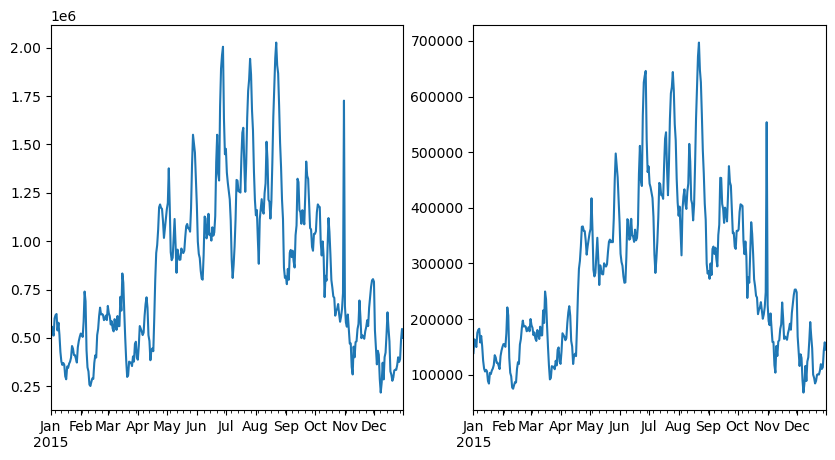

In [8]:
PRfV = read_file('PR_from_Vic', years=[2015])
VtPR = read_file('Vic_to_PR', years=[2015])
GIfV = read_file('GI_from_Vic', years=[2015])
VtGI = read_file('Vic_to_GI', years=[2015])
PRfPS = read_file('Puget_to_PR', years=[2015])
PRfD = read_file('Discovery_to_PR', years=[2015])
GIfPS = read_file('Puget_to_GI', years=[2015])
GIfD = read_file('Discovery_to_GI', years=[2015])

North_transport = ( 0.5 * (PRfV[2015].transport + VtPR[2015].transport) +
                     0.5 * (GIfV[2015].transport + VtGI[2015].transport) +
                     PRfPS[2015].transport + PRfD[2015].transport +
                    GIfPS[2015].transport + GIfD[2015].transport)
North_salt_flux = (0.5 * (PRfV[2015].transport * PRfV[2015].init_salt + 
                          VtPR[2015].transport * VtPR[2015].final_salt) +
                     0.5 * (GIfV[2015].transport * GIfV[2015].init_salt + 
                          VtGI[2015].transport * VtGI[2015].final_salt) +
                     PRfPS[2015].transport * PRfPS[2015].final_salt +
                    PRfD[2015].transport * PRfD[2015].final_salt +
                    GIfPS[2015].transport * GIfPS[2015].final_salt +
                    GIfD[2015].transport * GIfD[2015].final_salt
                    )
North_heat_flux = (0.5 * (PRfV[2015].transport * PRfV[2015].init_temp + 
                          VtPR[2015].transport * VtPR[2015].final_temp) +
                     0.5 * (GIfV[2015].transport * GIfV[2015].init_temp + 
                          VtGI[2015].transport * VtGI[2015].final_temp) +
                     PRfPS[2015].transport * PRfPS[2015].final_temp +
                    PRfD[2015].transport * PRfD[2015].final_temp +
                    GIfPS[2015].transport * GIfPS[2015].final_temp +
                    GIfD[2015].transport * GIfD[2015].final_temp
                    )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
North_salt_flux.plot(ax=axs[0]);
North_heat_flux.plot(ax=axs[1]);
print ('Water Flux =', North_transport.mean()/1e6) 
print ((North_salt_flux*1024/1000).mean())
print (North_heat_flux.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 5. Barotropic Flux to Vic ###

Water Flux = -0.008635662400220798
-258925.74478876215
-360.71662905161014


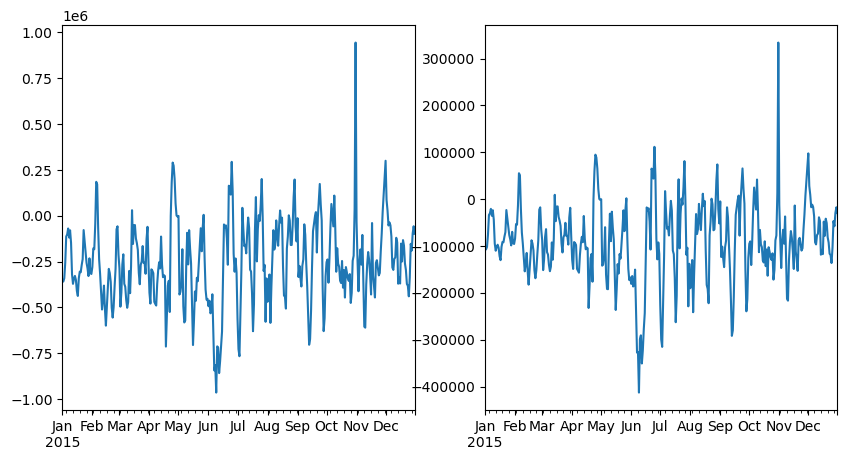

In [11]:
barotropic = (North_transport + South_transport)
appropriate_mean_salt = (PRfV[2015].init_salt + PRtV[2015].init_salt)/2.
barotropic_flux = barotropic * use_salt  #see salt calculation below
barotropic_heat = barotropic * use_heat
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
barotropic_flux.plot(ax=axs[0])
barotropic_heat.plot(ax=axs[1])
print ('Water Flux =', barotropic.mean()/1e6) 
print ((barotropic_flux*1024/1000).mean())
print (barotropic_heat.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 6. Baroclinic Flux to Vic ###

Water Flux = -0.03199547694531858
92773.6351193144
-237.5320813499305


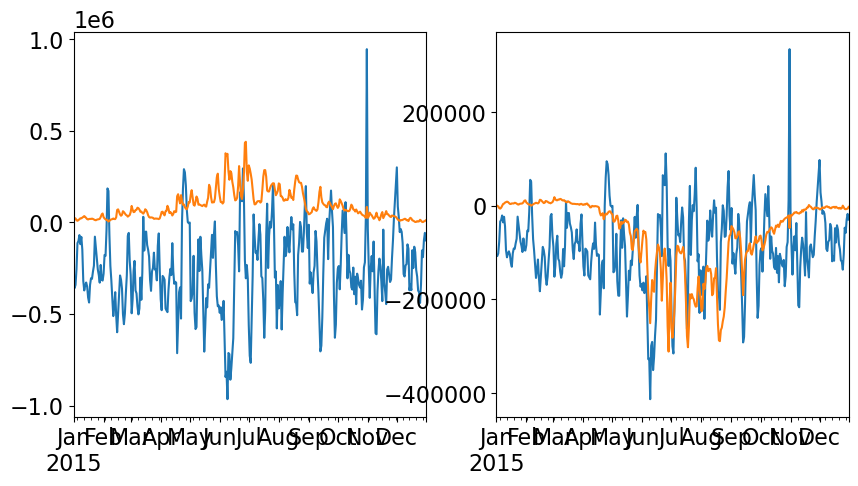

In [46]:
# barotropic = shallow + deep (shallow is larger and negative so barotropic flux is negative)
# baroclinic = shallow - deep  (negative as defined)
# shallow = 1/2 barotropic + 1/2 baroclinic
# deep = 1/2 barotropic - 1/2 baroclinic

# However to be consistent with Loops which we only count in one direction we halve the flux here!!!

baroclinic = 0.5 * (South_transport - North_transport)
baroclinic_flux = ((North_salt_flux + South_salt_flux)
    - barotropic_flux)
baroclinic_heat = ((North_heat_flux + South_heat_flux) 
                   - barotropic_heat)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
barotropic_flux.plot(ax=axs[0])
baroclinic_flux.plot(ax=axs[0])
barotropic_heat.plot(ax=axs[1])
baroclinic_heat.plot(ax=axs[1])
print ('Water Flux =',baroclinic.mean()/1e6) 
print ((baroclinic_flux*1024/1000).mean())
print (baroclinic_heat.mean()*3989.24*1024/1e9) # potential enthalpy in GW

In [13]:
print (North_transport.mean(), South_transport.mean(), barotropic.mean(), baroclinic.mean())

27677.645745208185 -36313.30814542898 -8635.662400220797 -31995.476945318584


In [14]:
print (North_salt_flux.mean(), South_salt_flux.mean(), barotropic_flux.mean(), baroclinic_flux.mean())

846683.177390436 -1008941.096989506 -252857.1726452755 90599.25304620547


In [15]:
print (South_salt_flux.mean()*1.024 + North_salt_flux.mean()*1.024) 

-166152.10966944776


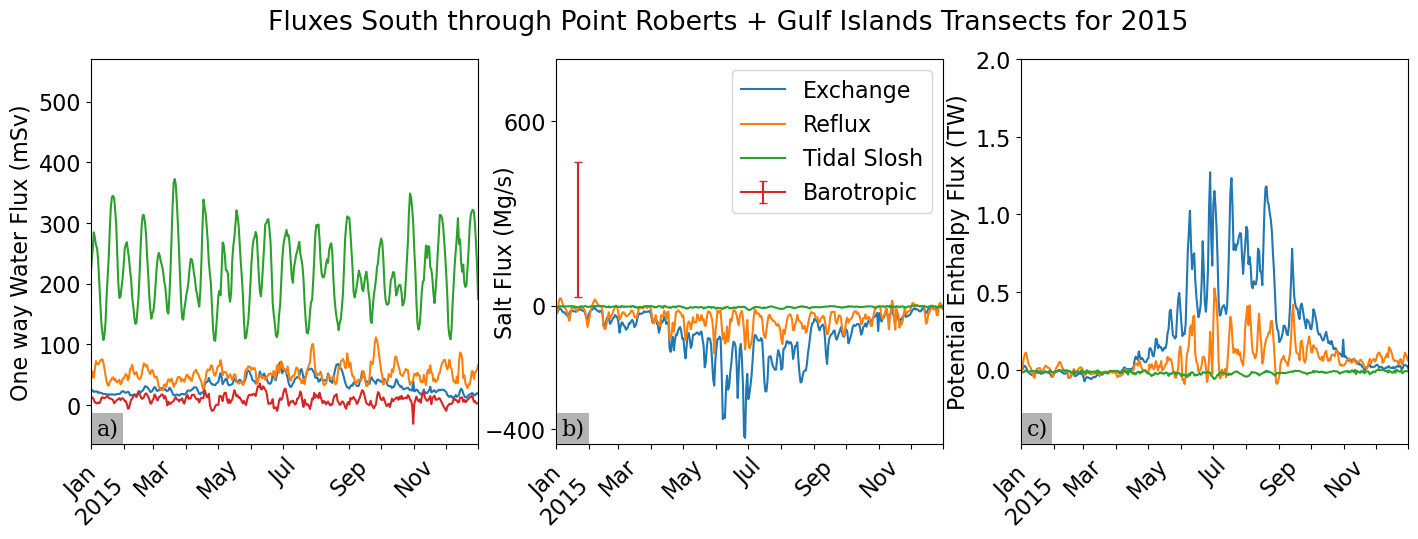

In [55]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
mylabels = ['a)', 'b)', 'c)']


(-baroclinic/1000.).plot(ax=axs[0], label="Exchange")
((LongLoops_PR.transport+ LongLoops_GI.transport)/1000).plot(ax=axs[0], label="Reflux")
((TidalPump_PR.transport+ TidalPump_GI.transport)/1000).plot(ax=axs[0], label="Tidal Slosh")
(-barotropic/1000.).plot(ax=axs[0], label="Barotropic")
#axs[0].legend()
axs[0].set_ylabel('One way Water Flux (mSv)')
(-baroclinic_flux/1024).plot(ax=axs[1], label="Exchange")
(-LongLoops_salt_transport/1024).plot(ax=axs[1], label="Reflux")
(-TidalPump_salt_transport/1024).plot(ax=axs[1], label="Tidal Slosh");
#(-barotropic_flux/1024.).plot(ax=axs[1], label="Barotropic")
# Barotropic
mean_baro = (-barotropic_flux/1024.).mean()
std_baro = (-barotropic_flux/1024.).std()
axs[1].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='tab:red', label='Barotropic')

axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
axs[1].yaxis.set_label_coords(-0.1, 0.2)
(-baroclinic_heat*3989.24*1024/1e12).plot(ax=axs[2], label="Exchange")
(-LongLoops_heat_transport*3989.24*1024/1e12).plot(ax=axs[2], label="Reflux")
(-TidalPump_salt_transport*3989.24*1024/1e12).plot(ax=axs[2], label="Tidal Slosh");
# Barotropic
#mean_baro = (-barotropic_heat*3989.24*1024/1e9).mean()
#std_baro = (-barotropic_heat*3989.24*1024/1e9).std()
#axs[2].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='r', label='Barotropic')

axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
#axs[2].legend()
axs[2].set_ylabel('Potential Enthalpy Flux (TW)')

for ii, ax in enumerate(axs):
    ax.minorticks_off()
    ax.tick_params(axis='x', labelrotation=45)
    for label in ax.xaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    ax.text(0.015, 0.012, mylabels[ii], transform=ax.transAxes,
            fontsize=16, verticalalignment='bottom', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

axs[1].set_yticks([-400, 0, 600])
axs[0].set_ylim(-65, 570)
axs[1].set_ylim(-450, 800)
axs[2].set_ylim(-0.48, 2)

#fig.tight_layout();
fig.suptitle('Fluxes South through Point Roberts + Gulf Islands Transects for 2015');
fig.savefig('south_fluxes_PR.png');
fig.savefig('south_fluxes_PR.pdf');

In [50]:
print ('Exchange', (-baroclinic_flux/1024).mean(), 'Reflux',
(-LongLoops_salt_transport/1024).mean(), 'Slosh', 
(-TidalPump_salt_transport/1024).mean(), 'Barotropic', (-barotropic_flux/1024.).mean())
print ( (-LongLoops_salt_transport/1024).mean()/((-baroclinic_flux/1024).mean()+(-LongLoops_salt_transport/1024).mean()+(-TidalPump_salt_transport/1024).mean()) )

Exchange -88.47583305293503 Reflux -37.75224108454183 Slosh -4.244883055776103 Barotropic 246.93083266140187
0.28934916396985044


[[1.         0.76967311]
 [0.76967311 1.        ]]
[[1.         0.98003399]
 [0.98003399 1.        ]]
[[1.         0.98414503]
 [0.98414503 1.        ]]


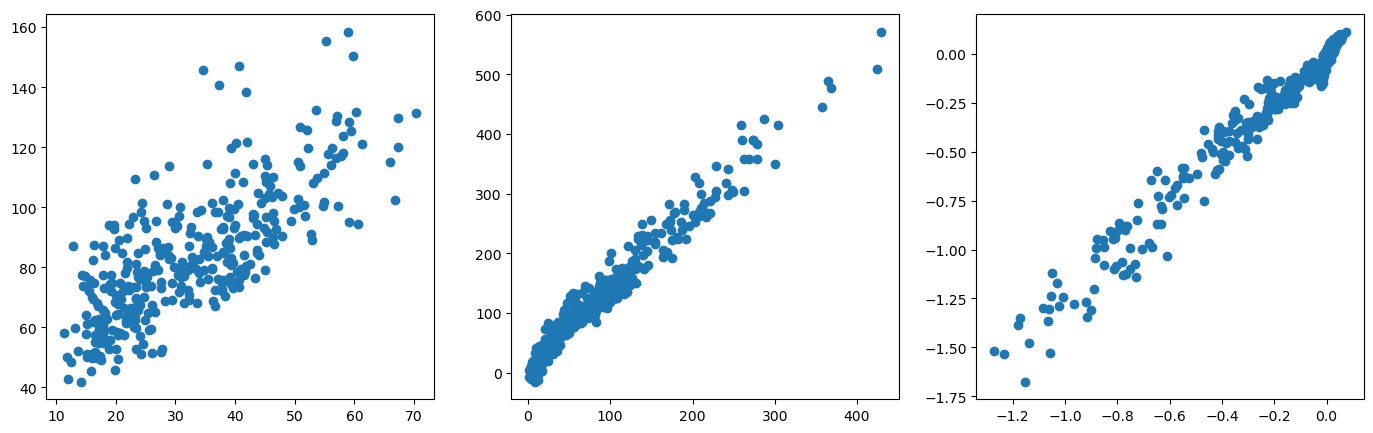

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].plot(-(baroclinic/1000.), -(baroclinic/1000.)+(LongLoops_PR.transport+ LongLoops_GI.transport)/1000, 'o')
#axs[0].set_xlim(0, 250)
#axs[0].set_ylim(0, 150)
axs[1].plot((baroclinic_flux/1024), baroclinic_flux/1024 + (LongLoops_salt_transport/1024), 'o')
axs[2].plot((baroclinic_heat*3989.24*1024/1e12), 
            (baroclinic_heat*3989.24*1024/1e12)+(LongLoops_heat_transport*3989.24*1024/1e12), 'o');

y = -(baroclinic/1000.)+(LongLoops_PR.transport+ LongLoops_GI.transport)/1000
x = (-baroclinic/1000.)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

y = (baroclinic_flux/1024.) + (LongLoops_salt_transport)/1024
x = (baroclinic_flux/1024.)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

y = LongLoops_heat_transport + (baroclinic_heat)
x = (baroclinic_heat)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

### appendix A 

29.338216487871687
29.459343094878953
29.9110997662738
2015-01-01 00:00:00+00:00    29.445127
2015-01-02 00:00:00+00:00    29.438385
2015-01-03 00:00:00+00:00    29.540418
2015-01-04 00:00:00+00:00    29.644139
2015-01-05 00:00:00+00:00    29.838475
                               ...    
2015-12-27 00:00:00+00:00    29.777082
2015-12-28 00:00:00+00:00    29.909385
2015-12-29 00:00:00+00:00    29.889108
2015-12-30 00:00:00+00:00    29.798800
2015-12-31 00:00:00+00:00    29.733953
Length: 365, dtype: float64 2015-01-01 00:00:00+00:00    8.806533
2015-01-02 00:00:00+00:00    8.798097
2015-01-03 00:00:00+00:00    8.823261
2015-01-04 00:00:00+00:00    8.833620
2015-01-05 00:00:00+00:00    8.885225
                               ...   
2015-12-27 00:00:00+00:00    9.104891
2015-12-28 00:00:00+00:00    9.103097
2015-12-29 00:00:00+00:00    9.066625
2015-12-30 00:00:00+00:00    9.003758
2015-12-31 00:00:00+00:00    8.926808
Length: 365, dtype: float64


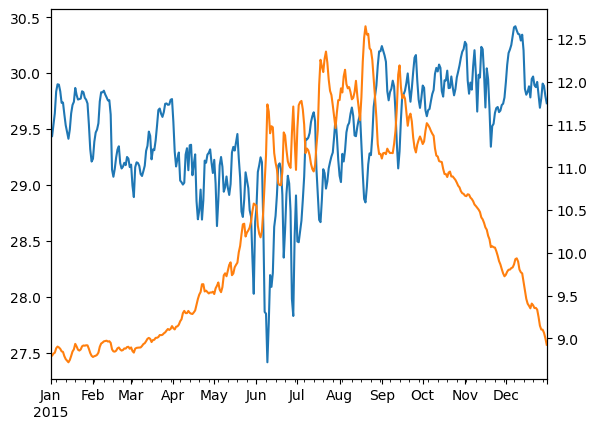

In [10]:
# calculate the appropriate salinity
# all salt heading south
print (appropriate_mean_salt.mean())
water_south = (TidalPump_PR.transport + TidalPump_GI.transport + LongLoops_PR.transport + LongLoops_GI.transport
            - South_transport)
salt_south = (TidalPump_PR.transport * TidalPump_PR.init_salt +
            TidalPump_GI.transport * TidalPump_GI.init_salt +
             LongLoops_PR.transport * LongLoops_PR.init_salt +
            LongLoops_GI.transport * LongLoops_GI.init_salt +
             - South_salt_flux)
heat_south = (TidalPump_PR.transport * TidalPump_PR.init_temp +
            TidalPump_GI.transport * TidalPump_GI.init_temp +
             LongLoops_PR.transport * LongLoops_PR.init_temp +
            LongLoops_GI.transport * LongLoops_GI.init_temp +
             - South_heat_flux)
print ((salt_south/water_south).mean())

water_north = (TidalPump_PR.transport + TidalPump_GI.transport + LongLoops_PR.transport + LongLoops_GI.transport
                + North_transport)
salt_north = (TidalPump_PR.transport * TidalPump_PR.final_salt +
            TidalPump_GI.transport * TidalPump_GI.final_salt +
             LongLoops_PR.transport * LongLoops_PR.final_salt +
            LongLoops_GI.transport * LongLoops_GI.final_salt +
             North_salt_flux)
heat_north = (TidalPump_PR.transport * TidalPump_PR.final_temp +
            TidalPump_GI.transport * TidalPump_GI.final_temp +
             LongLoops_PR.transport * LongLoops_PR.final_temp +
            LongLoops_GI.transport * LongLoops_GI.final_temp +
             North_salt_flux)
print ((salt_north/water_north).mean())

fig, ax = plt.subplots(1, 1)
(salt_south/water_south).plot(ax=ax)
ax2 = ax.twinx()
(heat_south/water_south).plot(ax=ax2, c='tab:orange')
use_salt = salt_south/water_south
use_heat = heat_south/water_south
print (use_salt, use_heat)

In [ ]:
29.338216487871687
29.778549601767686
29.79851159310874

29.338216487871687
29.676517253083794
29.83986003245676


In [ ]:
print (South_transport)

The grand sum

In [ ]:
4450 + 39586 - 1033156 + 867004 + 129462

In [ ]:
plt.plot(PRtV[2015].init_salt - PRtV[2015].final_salt)
plt.plot(VfPR[2015].final_salt - VfPR[2015].init_salt)
plt.plot(GItPS[2015].init_salt - GItPS[2015].final_salt)